In [1]:
import os
import numpy as np
import cv2
import glob
import matplotlib
import matplotlib.pyplot as plt
import pickle
import matplotlib.image as mpimg

%matplotlib inline

In [2]:
out_dir='output_images/calibrated/chess_images/'
# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')


In [3]:
#array to store object points and image points from al the images
objpoints = [] # obj points in 3d coordinates
imgpoints = [] # img points in 2 d cordinates


In [4]:
#ny is the number of inner points along a column
#nx is the number of inner points along a row

for ny in [5,6]:
    for nx in [6,7,9]:
        
        #prepare object points 
        objp = np.zeros((ny*nx,3), np.float32)
        objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2) #x,y coordinatres
        
        for idx,fname in enumerate(images):
            
            # read in the image
            img = cv2.imread(fname)
            #plt.imshow(img)
        
            # Convert to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
            # Find the chessboard corners
            ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
        
            # If found, draw corners
            if ret == True:
                imgpoints.append(corners)
                objpoints.append(objp)                
                image_name=os.path.split(fname)[1]
                write_name = out_dir+'corners_found_ny'+str(ny)+'_nx'+str(nx)+'_'+image_name
                cv2.imwrite(write_name, img)              
                print (" findchess board passed for this image {}, nx {}, ny{}".format(idx,nx,ny))
                cv2.imshow('img', img)
                cv2.waitKey(500)
    cv2.destroyAllWindows()


 findchess board passed for this image 6, nx 6, ny5
 findchess board passed for this image 14, nx 6, ny5
 findchess board passed for this image 15, nx 7, ny5
 findchess board passed for this image 0, nx 9, ny5
 findchess board passed for this image 6, nx 6, ny6
 findchess board passed for this image 15, nx 7, ny6
 findchess board passed for this image 1, nx 9, ny6
 findchess board passed for this image 2, nx 9, ny6
 findchess board passed for this image 3, nx 9, ny6
 findchess board passed for this image 4, nx 9, ny6
 findchess board passed for this image 5, nx 9, ny6
 findchess board passed for this image 6, nx 9, ny6
 findchess board passed for this image 7, nx 9, ny6
 findchess board passed for this image 8, nx 9, ny6
 findchess board passed for this image 9, nx 9, ny6
 findchess board passed for this image 10, nx 9, ny6
 findchess board passed for this image 11, nx 9, ny6
 findchess board passed for this image 12, nx 9, ny6
 findchess board passed for this image 13, nx 9, ny6
 find

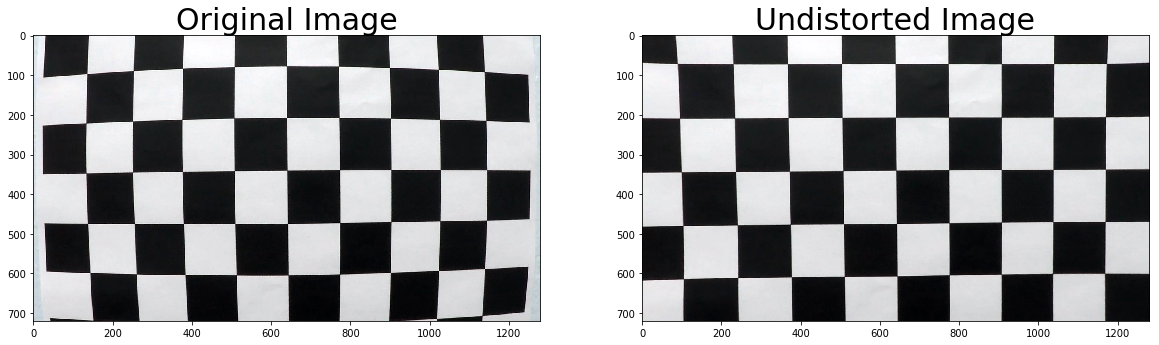

In [5]:
# Test undistortion on an image
img = cv2.imread('camera_cal/calibration1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
dst = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [6]:
# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_dist_pickle_notebook.p", "wb" ) )

In [9]:
# Visualize undistortion
# Step through the list and search for chessboard corners
# load pickled distortion matrix

with open('camera_dist_pickle_notebook.p', mode='rb') as f:
    dist_pickle = pickle.load(f)
    mtx = dist_pickle["mtx"]
    dist = dist_pickle["dist"]
    
# Visualize undistortion on test images

for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    image_name=os.path.split(fname)[1]
    write_name = out_dir+'undistorted/'+image_name
    cv2.imwrite(write_name,dst)
    print(write_name)
    cv2.imshow('dst', dst)
    cv2.waitKey(500)
cv2.destroyAllWindows()

output_images/calibrated/chess_images/undistorted/calibration1.jpg
output_images/calibrated/chess_images/undistorted/calibration10.jpg
output_images/calibrated/chess_images/undistorted/calibration11.jpg
output_images/calibrated/chess_images/undistorted/calibration12.jpg
output_images/calibrated/chess_images/undistorted/calibration13.jpg
output_images/calibrated/chess_images/undistorted/calibration14.jpg
output_images/calibrated/chess_images/undistorted/calibration15.jpg
output_images/calibrated/chess_images/undistorted/calibration16.jpg
output_images/calibrated/chess_images/undistorted/calibration17.jpg
output_images/calibrated/chess_images/undistorted/calibration18.jpg
output_images/calibrated/chess_images/undistorted/calibration19.jpg
output_images/calibrated/chess_images/undistorted/calibration2.jpg
output_images/calibrated/chess_images/undistorted/calibration20.jpg
output_images/calibrated/chess_images/undistorted/calibration3.jpg
output_images/calibrated/chess_images/undistorted/c